<a href="https://colab.research.google.com/github/makhijakabir/machine-learning/blob/main/bayesClassifierESFtesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Testing, checking inference and, evaluating the model using the bayes classifier to build an email spam filter

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

##Constants

In [3]:
tokenSpamProbFile = '/content/drive/MyDrive/Colab Notebooks/SpamData/03_Testing/prob-spam.txt'
tokenNotSpamProbFile = '/content/drive/MyDrive/Colab Notebooks/SpamData/03_Testing/prob-notspam.txt'

tokenAllProbFile = '/content/drive/MyDrive/Colab Notebooks/SpamData/03_Testing/prob-all-tokens.txt'

testFeaturesMatrixFile = '/content/drive/MyDrive/Colab Notebooks/SpamData/03_Testing/test-features.txt'
testTargetFile = '/content/drive/MyDrive/Colab Notebooks/SpamData/03_Testing/test-target-file.txt'

vocabSize = 2500

##Load the Data

In [4]:
#features
xTest = np.loadtxt(testFeaturesMatrixFile, delimiter=' ')

#Target
yTest = np.loadtxt(testTargetFile, delimiter=' ')

#Token Probabilities
probTokenSpam = np.loadtxt(tokenSpamProbFile, delimiter=' ')
probTokenNotSpam = np.loadtxt(tokenNotSpamProbFile, delimiter=' ')
probAll = np.loadtxt(tokenAllProbFile, delimiter=' ')

##Spam Probability Set the PRIOR

$(Spam \, | \, X) = \frac{P(X \, | \, Spam \,) \, P(Spam)}{P(X)}$

In [5]:
probSpam = 0.3116

###Joint Probability in LOG format

In [6]:
logJointSpam = xTest.dot(np.log(probTokenSpam) - np.log(probAll)) + np.log(probSpam)

In [7]:
logJointSpam[: 5]

array([ 5.03989819, 14.87701323, 96.77694121,  7.46314895, 16.48771107])

##Not Sapm Probability Set the PRIOR

$(Not \, Spam \, | \, X) = \frac{P(X \, | \, Not \, Spam \,) \, (1 \, - \, P(Spam))}{P(X)}$

In [8]:
probNotSpam = 1 - 0.3116 

###Joint Probability in LOG format

In [9]:
logJointNotSpam = xTest.dot(np.log(probTokenNotSpam) - np.log(probAll)) + np.log(probNotSpam)

In [10]:
logJointNotSpam[: 5]

array([ -12.83638491,  -29.96532013, -193.83139411,  -36.32987775,
        -33.5437104 ])

##Making Predictions whether or not an email is spam

###Checking for the higher joint probability

$P(Spam \, | \, X) \, > \, P(Not \, Spam \, | \, X)$
<br>**OR**<br>
$P(Spam \, | \, X) \, < \, P(Not \, Spam \, | \, X)$

In [11]:
prediction = logJointSpam > logJointNotSpam  

##Metrics and Evaluation

###Accuracy

In [12]:
correctDocs = (yTest == prediction).sum()
print('Total no of emails verified corretcly is:', correctDocs)

incorrectDocs = xTest.shape[0] - correctDocs
print('total no of emails verified incorrectly is:', incorrectDocs)

Total no of emails verified corretcly is: 1675
total no of emails verified incorrectly is: 42


In [13]:
#Accuracy

fracCorrect = correctDocs/len(xTest)
fracIncorrect = 1 - fracCorrect
print('the percentage of wrongly classified emails is: {:2%}'.format(fracIncorrect))
print('the ACCURACY of the model is {:2%}'.format(fracCorrect))

the percentage of wrongly classified emails is: 2.446127%
the ACCURACY of the model is 97.553873%


##Visualising the Results

In [14]:
#Chart Styling Info

yAxisLabel = 'P(X | Spam)'
xAxisLabel = 'p(X | Not Spam)'

linedata = np.linspace(start=-100, stop=20, num=1000)

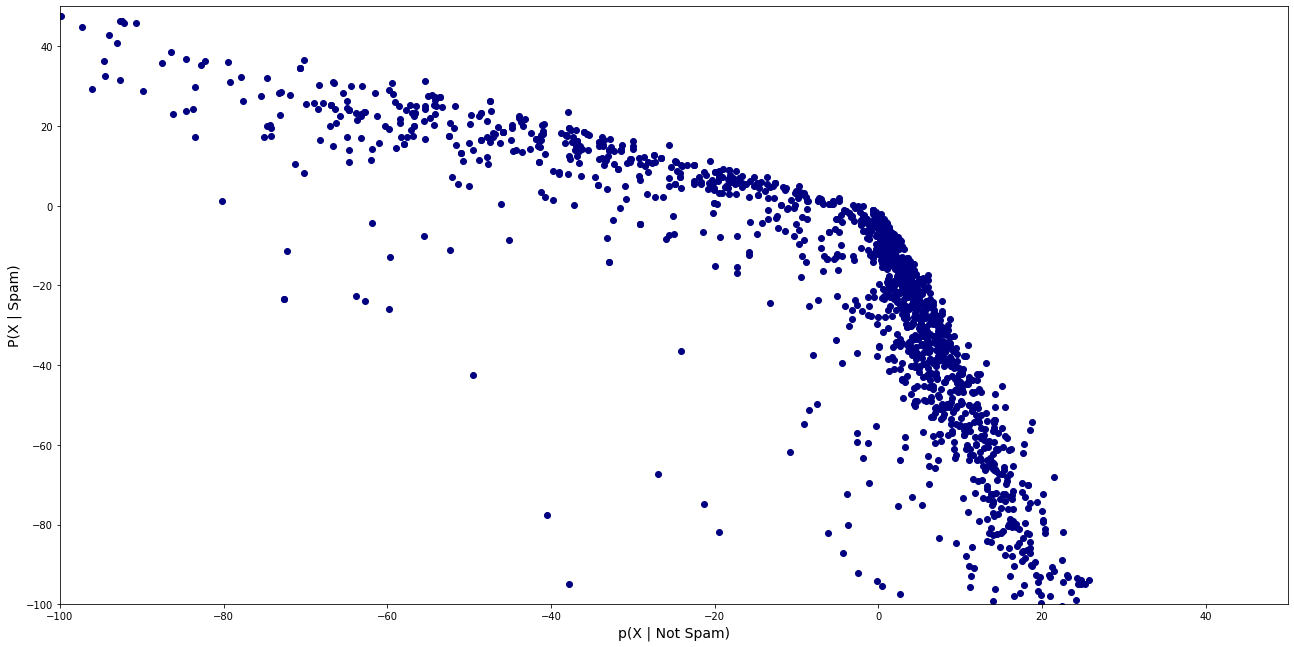

In [15]:
plt.figure(figsize=(22, 11))
plt.xlabel(xAxisLabel, fontsize=14)
plt.ylabel(yAxisLabel, fontsize=14)

plt.xlim([-100, 50])
plt.ylim([-100, 50])

plt.scatter(logJointNotSpam, logJointSpam, color='navy')
plt.show()

###The Decision Boundary

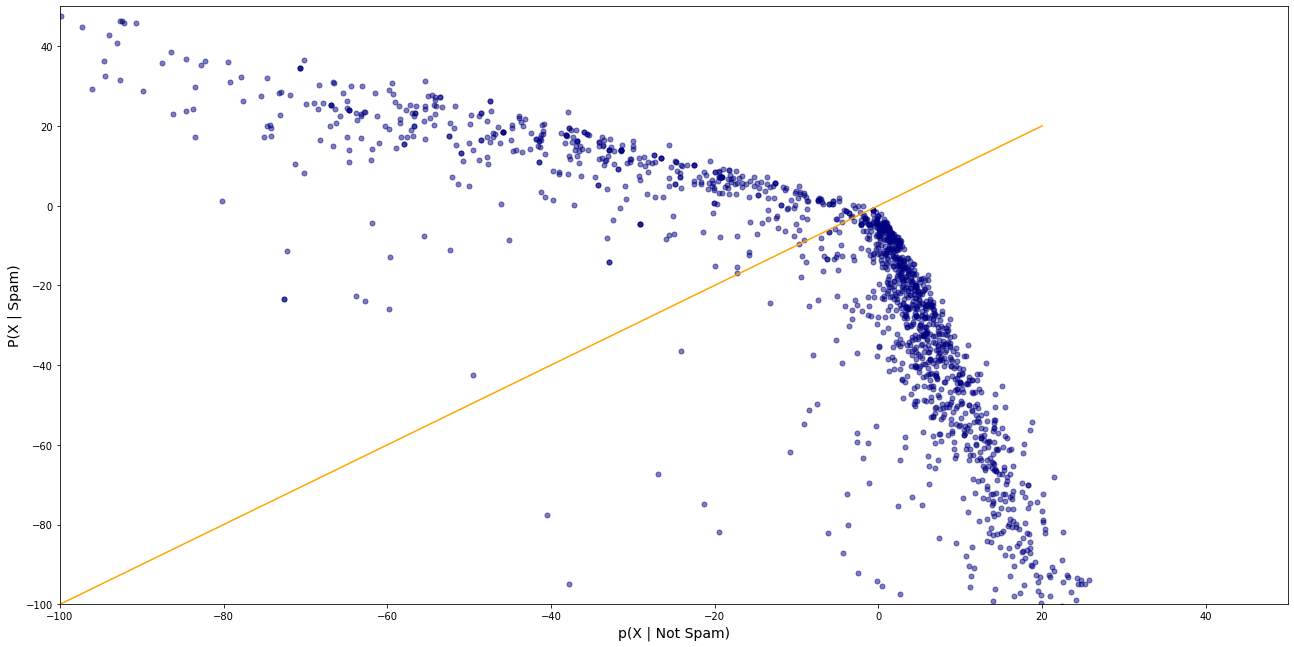

In [16]:
plt.figure(figsize=(22, 11))
plt.xlabel(xAxisLabel, fontsize=14)
plt.ylabel(yAxisLabel, fontsize=14)

plt.xlim([-100, 50])
plt.ylim([-100, 50])

plt.scatter(logJointNotSpam, logJointSpam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

plt.show()

###Subplotting

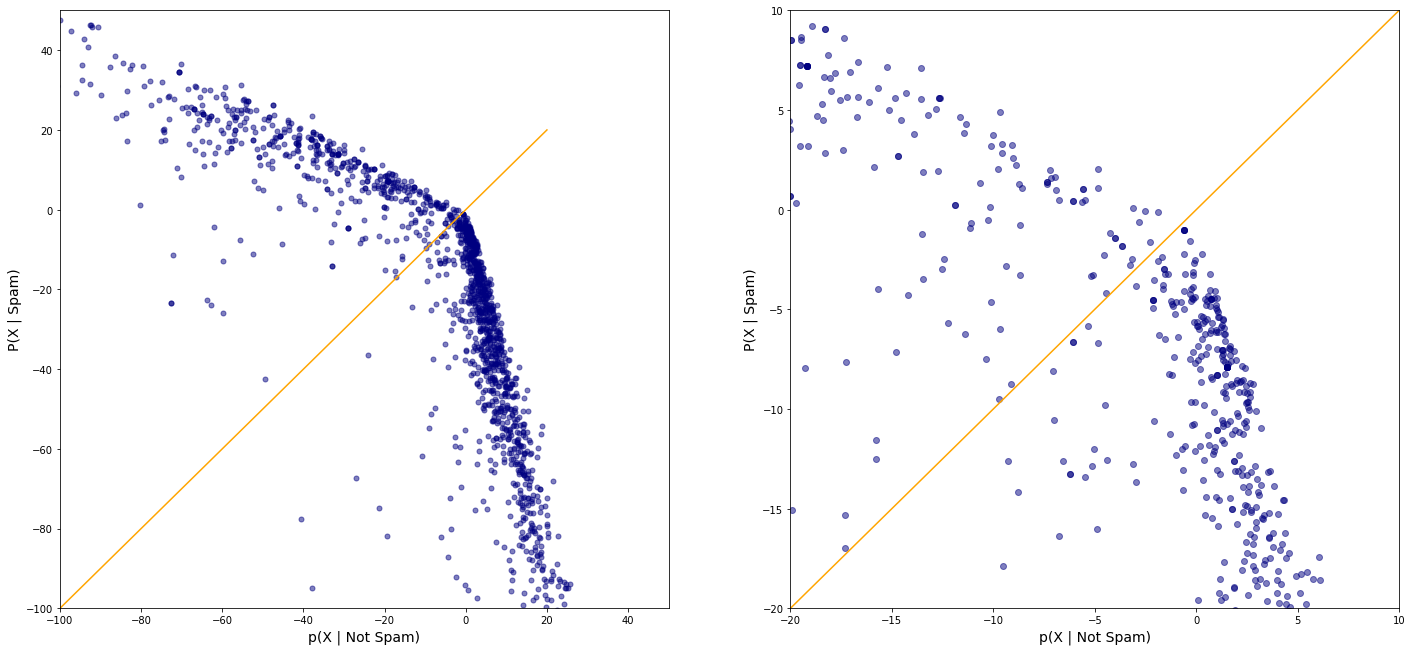

In [17]:
plt.figure(figsize=(24, 11))

#Chart No 1
plt.subplot(1, 2, 1)

plt.xlabel(xAxisLabel, fontsize=14)
plt.ylabel(yAxisLabel, fontsize=14)

plt.xlim([-100, 50])
plt.ylim([-100, 50])

plt.scatter(logJointNotSpam, logJointSpam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

#Chart No 2
plt.subplot(1, 2, 2)
plt.xlabel(xAxisLabel, fontsize=14)
plt.ylabel(yAxisLabel, fontsize=14)

plt.xlim([-20, 10])
plt.ylim([-20, 10])

plt.scatter(logJointNotSpam, logJointSpam, color='navy', alpha=0.5)
plt.plot(linedata, linedata, color='orange')

plt.show()

###Seanborn well designed charts

In [18]:
#chart Styling

sns.set_style('whitegrid')
labels = 'Actual Category'

summaryDF = pd.DataFrame({yAxisLabel: logJointNotSpam, xAxisLabel: logJointSpam, labels: yTest})

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


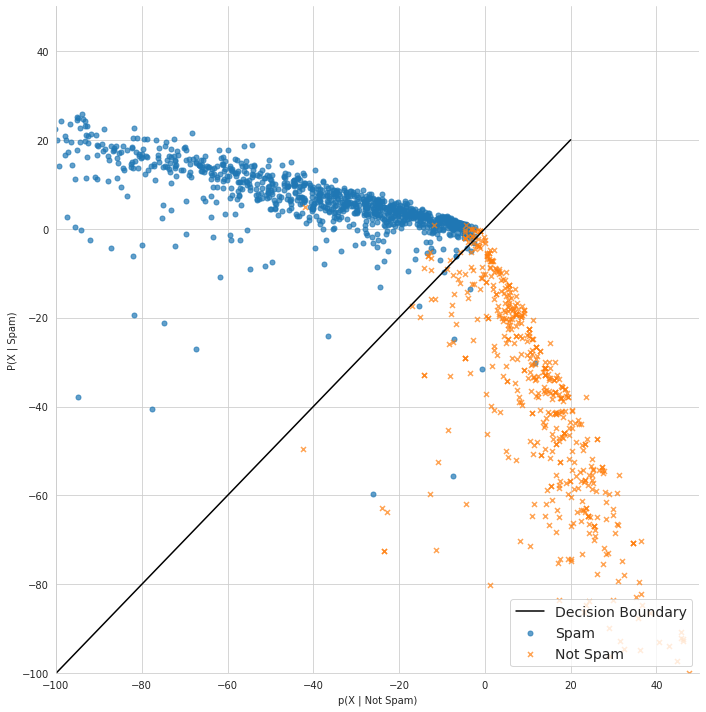

In [19]:
sns.lmplot(x=xAxisLabel, y=yAxisLabel, data=summaryDF, size=10, fit_reg=False, scatter_kws={'alpha':0.7, 's':25}, hue=labels, markers=['o', 'x'], legend=False)

plt.xlim([-100, 50])
plt.ylim([-100, 50])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Spam', 'Not Spam'), loc='lower right', fontsize=14)

plt.show()

##False Positives and False Negatives

In [20]:
np.unique(prediction, return_counts=True) 

(array([False,  True]), array([1153,  564]))

In [23]:
truePos = (yTest == 1) & (prediction == 1)
falsePos = (yTest == 1) & (prediction == 0)
trueNeg = (yTest == 0) & (prediction == 0)
falseNeg = (yTest == 0) & (prediction == 1)

552

##Recall Score

In [29]:
recallScore = truePos.sum() / (truePos.sum() + falseNeg.sum())
print('The Recall Score for the model prepared is: {:.2%}'.format(recallScore))

The Recall Score for the model prepared is: 97.87%


##Precision Score

In [32]:
precisionScore = truePos.sum() / (truePos.sum() + falsePos.sum())
print('The Precision Score for the model prepared is: {:.3}'.format(precisionScore))

The Precision Score for the model prepared is: 0.948


##F Score

In [33]:
fScore = 2 * (precisionScore * recallScore) / (precisionScore + recallScore)
print('The F Score for the model prepared is: {:.3}'.format(fScore))

The F Score for the model prepared is: 0.963
